In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [467]:
data = pd.read_csv('big_mart.csv')

In [468]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [469]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [470]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [471]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [472]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)

In [473]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [474]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

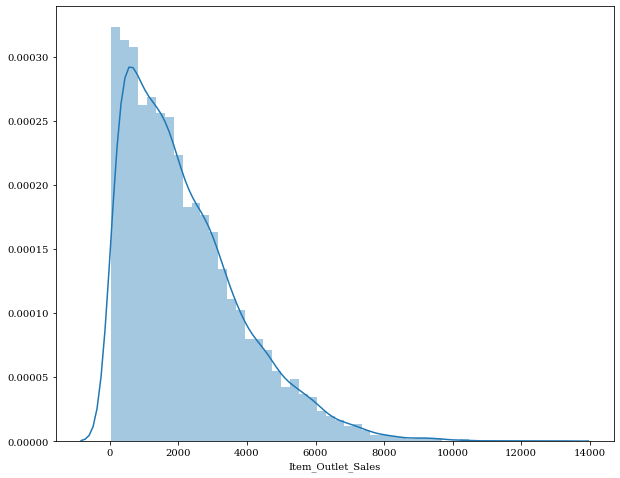

In [475]:
sns.distplot(data['Item_Outlet_Sales'])

In [476]:
data.groupby('Item_Type').sum()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,8020.586261,44.821706,81894.7364,1294528,1.265525e+06
Breads,2919.084324,16.630030,35379.1198,501412,5.532372e+05
Breakfast,1406.380549,9.429531,15596.6966,219707,2.322990e+05
Canned,8047.115970,44.215926,90706.7270,1296801,1.444151e+06
Dairy,9090.641841,49.395349,101276.4596,1362419,1.522594e+06
Frozen Foods,11012.905035,56.192325,118558.8814,1710309,1.825735e+06
Fruits and Vegetables,16214.718424,84.407946,178124.0810,2461191,2.820060e+06
Hard Drinks,2484.847001,13.897707,29334.6766,427610,4.577934e+05
Health and Hygiene,6808.383067,28.712309,68025.8388,1038822,1.045200e+06


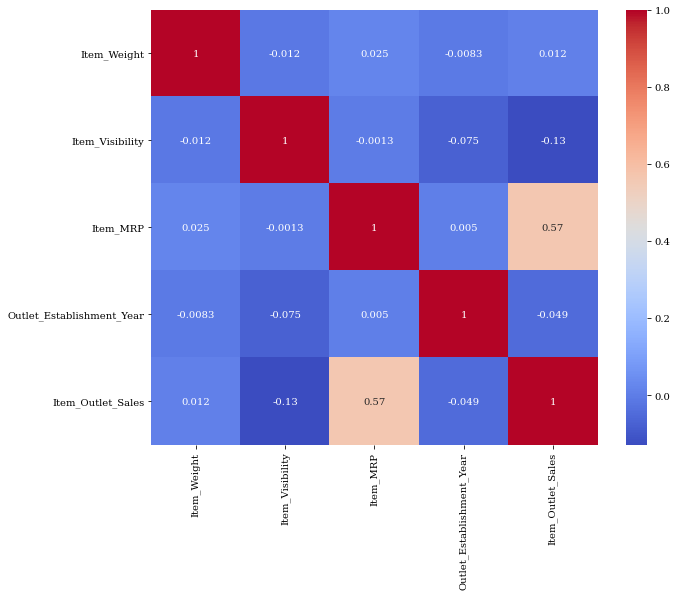

In [477]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [478]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [479]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [480]:
def correct_name(a,b):
    data['Item_Fat_Content'].replace(a,b,inplace=True)

In [481]:
correct_name('LF','Low Fat')
correct_name('low fat','Low Fat')
correct_name('reg','Regular')

In [482]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [483]:
data['year_count'] = data['Outlet_Establishment_Year'].apply(lambda x:2020-x)

In [484]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,year_count
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [485]:
def count_plots(x):
    plt.figure(figsize=(30,12))
    sns.countplot(data[x])
    plt.xticks(rotation=90,fontsize=18)
    plt.yticks(fontsize=18)

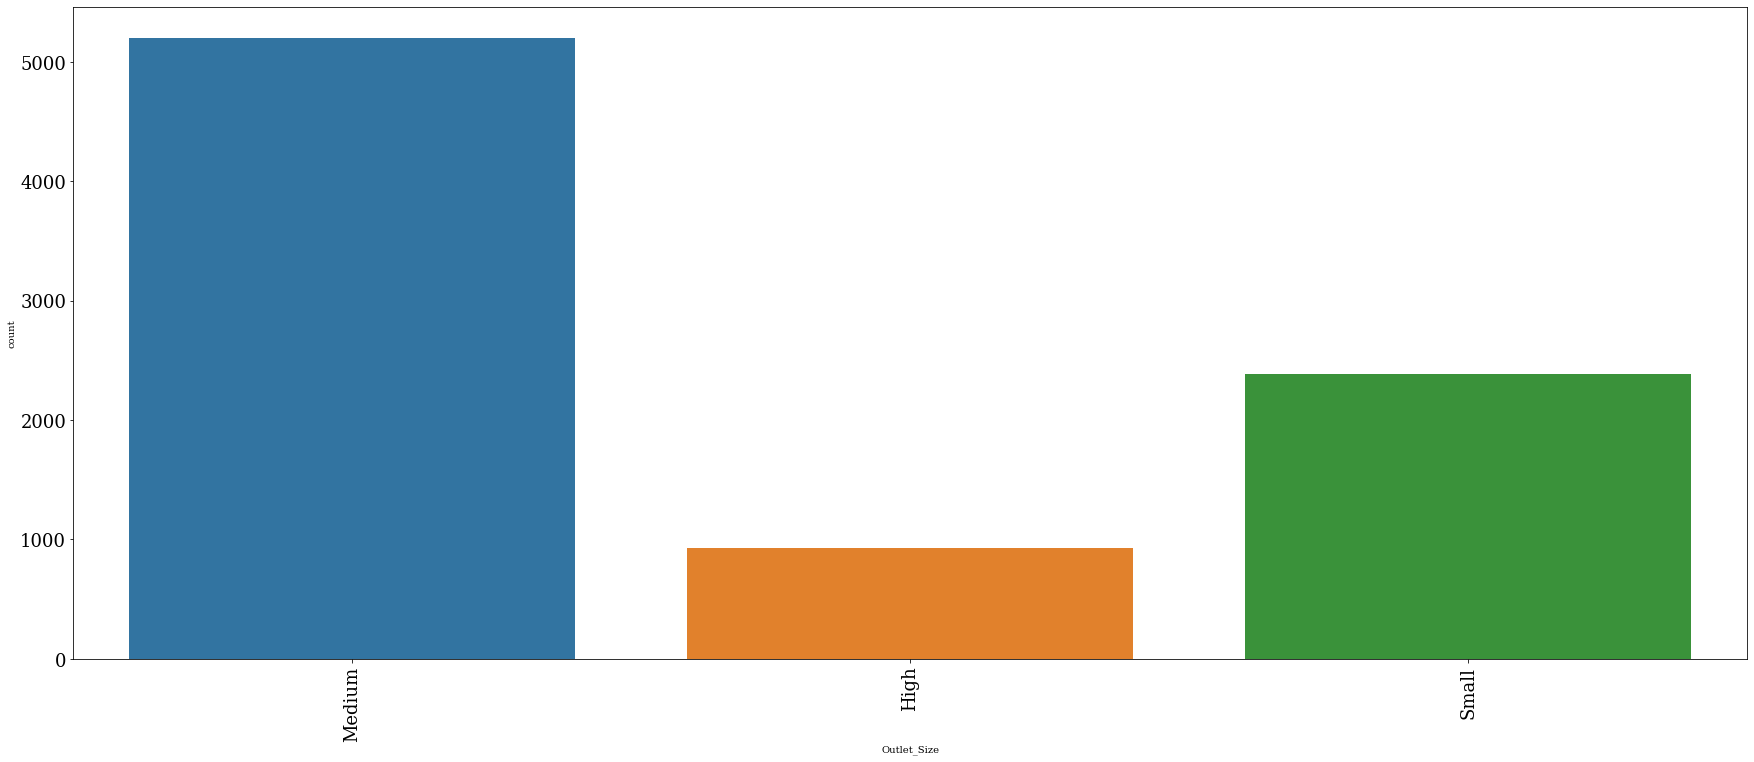

In [486]:
count_plots('Outlet_Size')

In [487]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'year_count'],
      dtype='object')

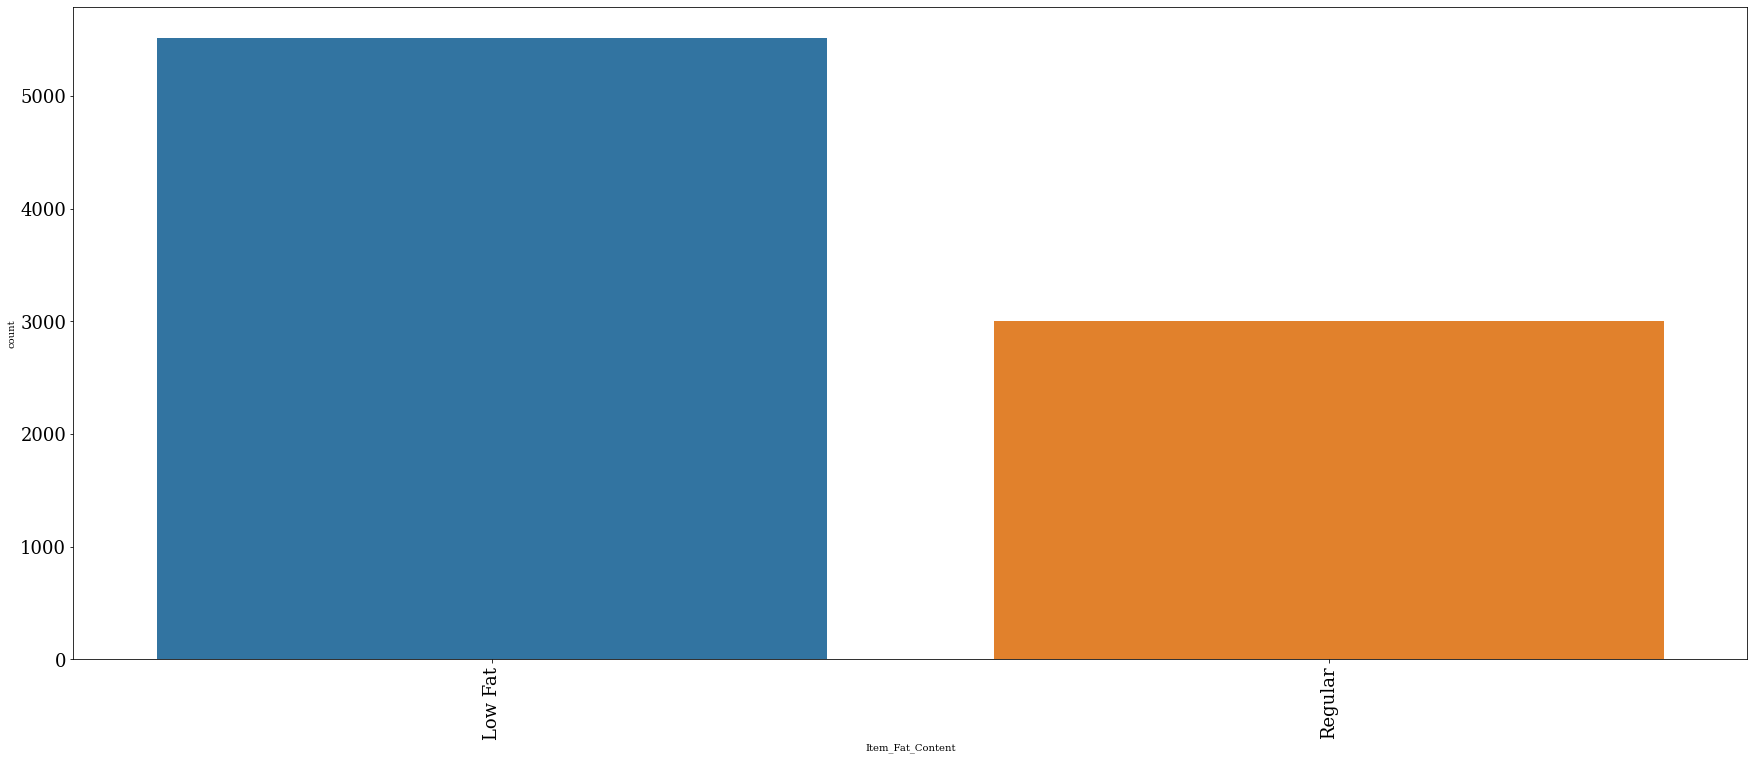

In [488]:
count_plots('Item_Fat_Content')

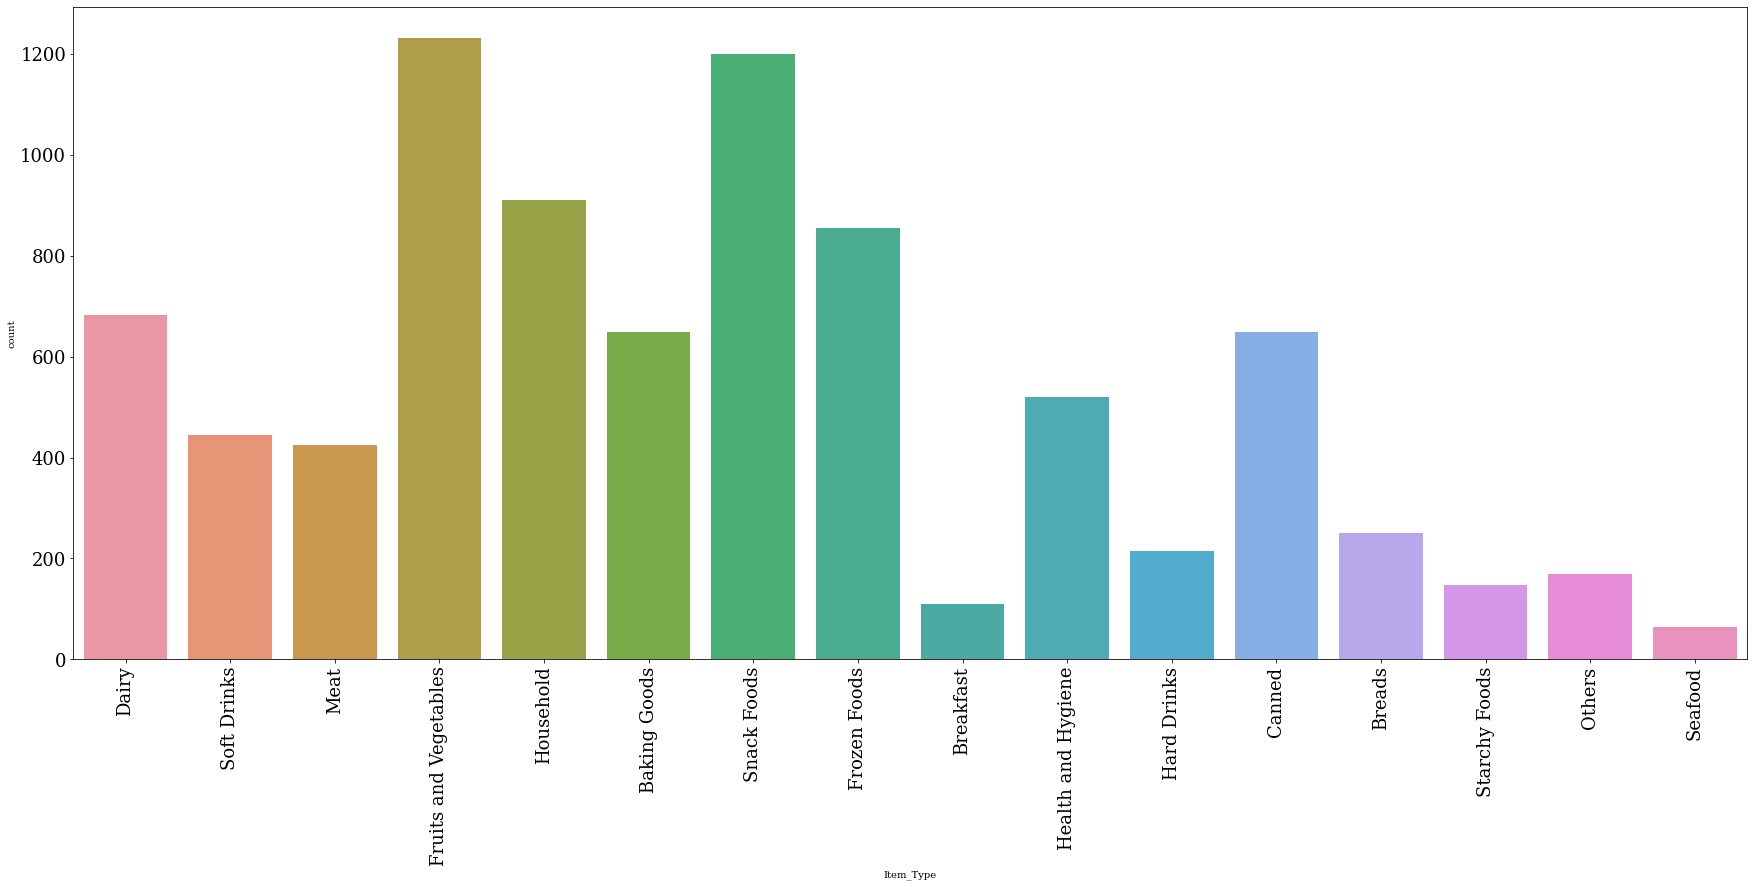

In [489]:
count_plots('Item_Type')

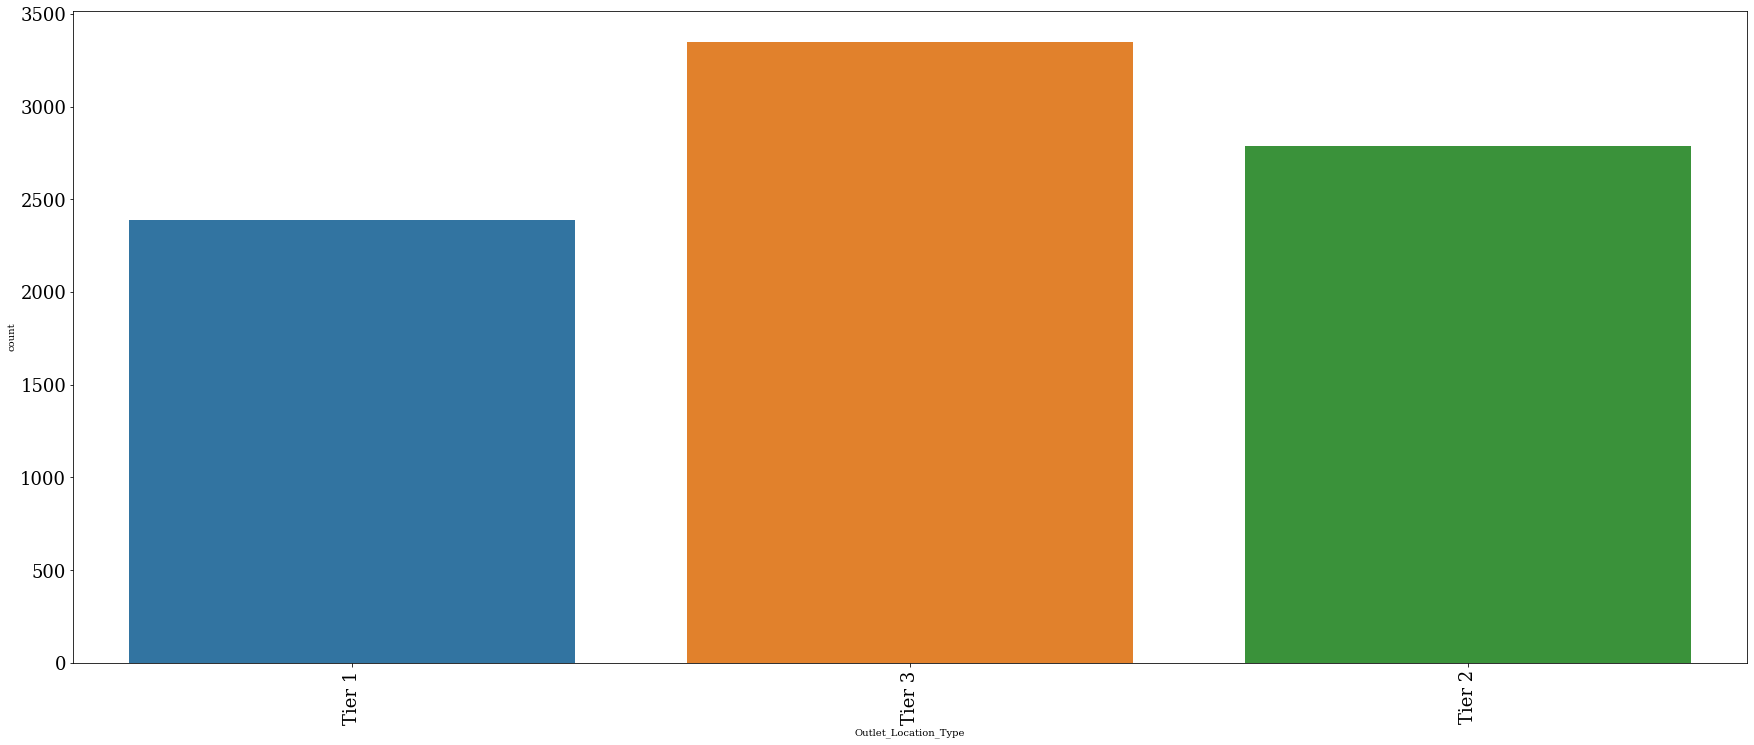

In [490]:
count_plots('Outlet_Location_Type')

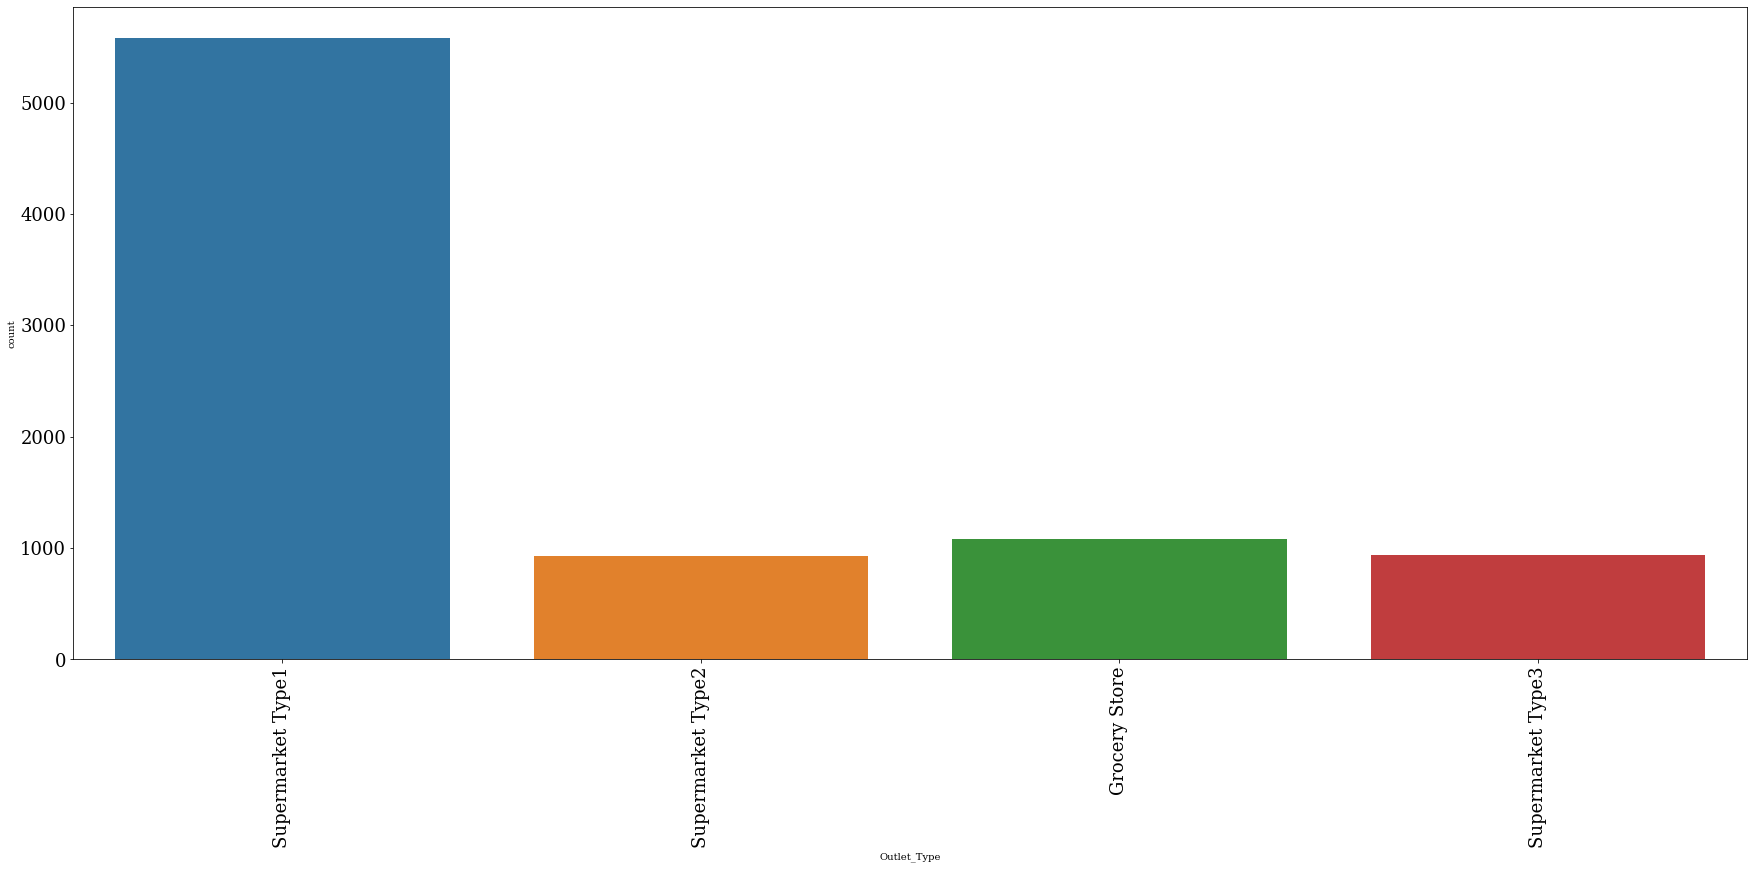

In [491]:
count_plots('Outlet_Type')

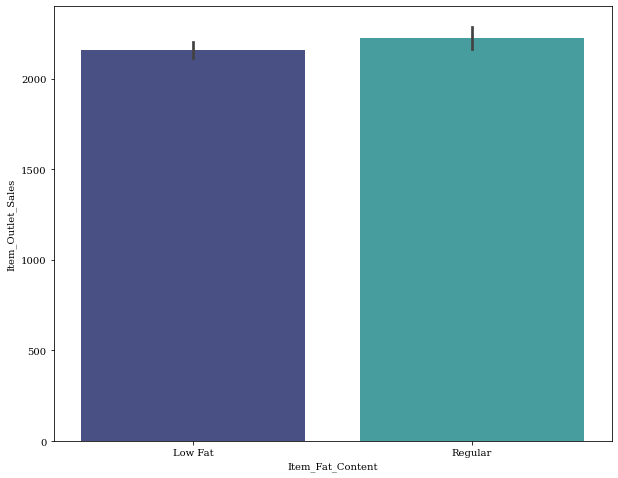

In [492]:
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=data,palette='mako')

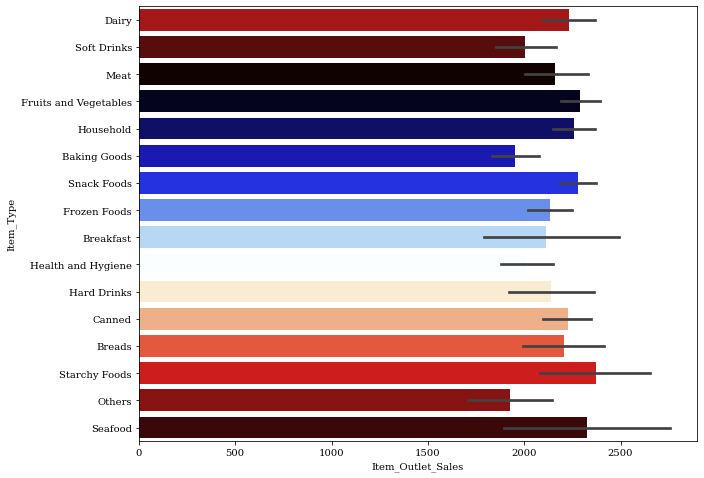

In [493]:
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=data,palette='flag')

In [494]:
encoder = LabelEncoder()
object_vars = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for objects in object_vars:
    data[objects] = encoder.fit_transform(data[objects]) 

In [495]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,year_count
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,21
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,11
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,21
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,22
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,33


In [496]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'year_count'],
      dtype='object')

In [497]:
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'year_count']
target = ['Item_Outlet_Sales']

In [498]:
X = data[features]
y = data[target]

In [531]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [532]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_train_prediction = lm.predict(X_train)
y_test_prediction = lm.predict(X_test)

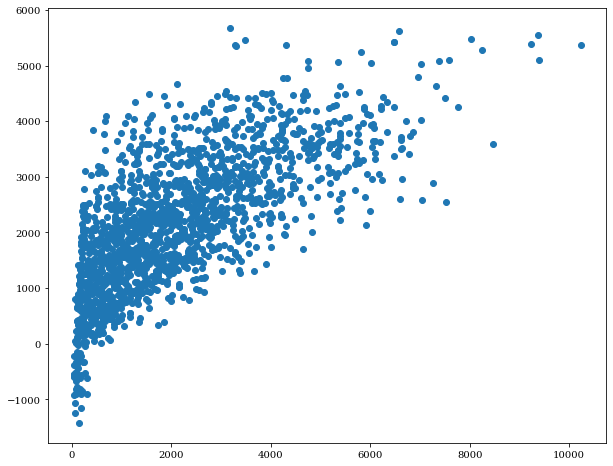

In [533]:
plt.scatter(y_test,y_test_prediction)

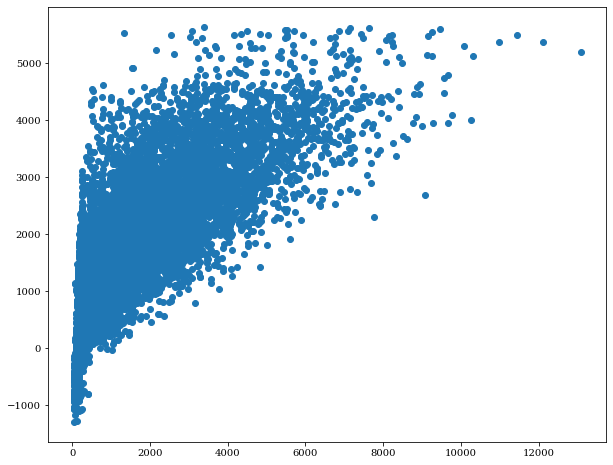

In [534]:
plt.scatter(y_train,y_train_prediction)

In [535]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_test_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_prediction)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_prediction))
print('MSE:', metrics.mean_squared_error(y_train, y_train_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction)))

-------Test Data--------
MAE: 880.9630396797251
MSE: 1351585.3691175187
RMSE: 1162.5770379280327

-------Train Data--------
MAE: 904.3416066734295
MSE: 1453250.668069242
RMSE: 1205.5084686841656


In [536]:
from sklearn.preprocessing import PolynomialFeatures 

In [537]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X_train) 
X_poly_test = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 

LinearRegression()

In [538]:
y_train_predicted = lin2.predict(X_poly)
y_test_predict = lin2.predict(poly.fit_transform(X_test))

In [539]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predicted))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predicted)))

-------Test Data--------
MAE: 743.2056914369502
MSE: 1096439.8343876633
RMSE: 1047.1102302946254

-------Train Data--------
MAE: 749.7920362422998
MSE: 1138218.6355595984
RMSE: 1066.8732987377641


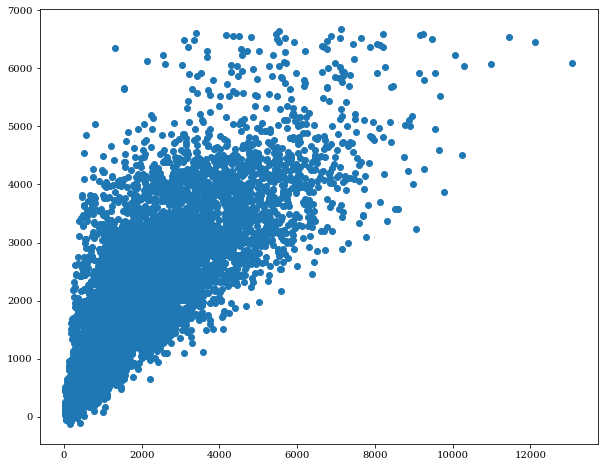

In [540]:
plt.scatter(y_train,y_train_predicted)

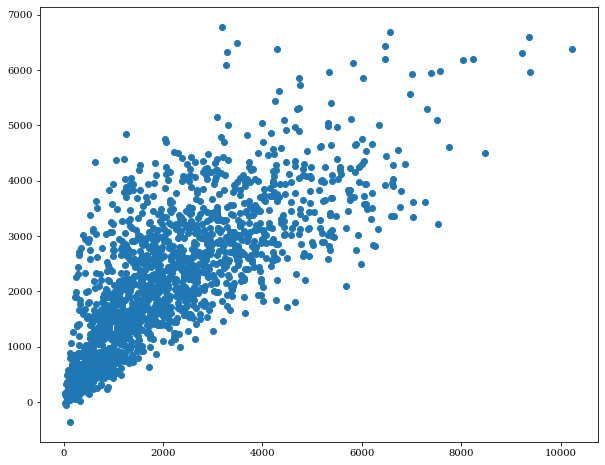

In [541]:
plt.scatter(y_test,y_test_predict)

In [ ]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 2)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=2)

In [ ]:
y_tst_pred = regressor.predict(X_test)
y_trn_pred = regressor.predict(X_train)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_tst_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_tst_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_tst_pred)))

In [ ]:
plt.scatter(y_test,y_tst_pred)